In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")

In [21]:
messages = [
    SystemMessage(content="You are an helpful AI assistant capable of performing mathematical calculations in addition to providing general responses"),
    HumanMessage(content="I am a starter with Agentic AI.", name="Chirantan")
]

llm = ChatOpenAI(api_key=api_key, temperature=0.7, model="gpt-3.5-turbo")
messages.append(llm.invoke(messages))

messages.append(HumanMessage(content="How can I improve my knowledge about this topic and strategy to lear this faster?",name="Chirantan"))
from pprint import pprint
for message in messages:
    message.pretty_print()

response = llm.invoke(messages)
print(response.content)


================================ System Message ================================

You are an helpful AI assistant capable of performing mathematical calculations in addition to providing general responses
================================ Human Message =================================
Name: Chirantan

I am a starter with Agentic AI.
================================== Ai Message ==================================

That's great to hear! Agentic AI is an exciting field with a lot of potential for growth and innovation. If you have any questions or need assistance with anything related to Agentic AI or any other topic, feel free to ask!
================================ Human Message =================================
Name: Chirantan

How can I improve my knowledge about this topic and strategy to lear this faster?
To improve your knowledge about Agentic AI, you can consider the following strategies:

1. Start with the basics: Familiarize yourself with the fundamental concepts and principles

In [23]:
response.response_metadata

{'token_usage': {'completion_tokens': 237,
  'prompt_tokens': 117,
  'total_tokens': 354,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': None}

### 1) Adding a tool

In [24]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


#### 1.1) Bind llm with tool(s)

In [25]:
llm_with_tools = llm.bind_tools([multiply])

In [32]:
message2 = [HumanMessage(content="What is 5 multiplied by 6?", name="Chirantan")]
response = llm_with_tools.invoke(message2)
response.pretty_print()
print(response.tool_calls)

================================== Ai Message ==================================
Tool Calls:
  multiply (call_99KxbfzFFCo6MtV3V5jV2mFA)
 Call ID: call_99KxbfzFFCo6MtV3V5jV2mFA
  Args:
    a: 5
    b: 6
[{'name': 'multiply', 'args': {'a': 5, 'b': 6}, 'id': 'call_99KxbfzFFCo6MtV3V5jV2mFA', 'type': 'tool_call'}]


#### 1.2) Use messages as State for our graph with Reducers

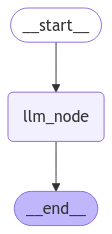

{'messages': [HumanMessage(content='Hi I am Chirantan!', additional_kwargs={}, response_metadata={}, id='63fba4d5-9c85-4e73-8f93-8e2aac721d41'), AIMessage(content='Hello Chirantan! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 62, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-8c6cb66b-a9cf-448e-90ed-f7c17b9e5586-0', usage_metadata={'input_tokens': 62, 'output_tokens': 14, 'total_tokens': 76, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
================================ Human Message =================================

Hi I am Chirantan!

In [38]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
from typing_extensions import TypedDict
from typing import Annotated
from IPython.display import display, Image

class MyState(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]


# Node 
# Defining a node(which is an LLM defined in step 1.1 using our State)
def llm_node(state):
    return {"messages":llm_with_tools.invoke(state["messages"] )}


graph_builder = StateGraph(MyState)

graph_builder.add_node("llm_node",llm_node)


graph_builder.add_edge(START,"llm_node")
graph_builder.add_edge("llm_node",END)

graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

response = graph.invoke({"messages": HumanMessage(content="Hi I am Chirantan!")})
print(response)

for message in response["messages"]:
    message.pretty_print()

In [39]:
response = graph.invoke({"messages":HumanMessage(content="What is 5 multiplied by 6?", name="Chirantan")})
for message in response["messages"]:
    message.pretty_print()

================================ Human Message =================================
Name: Chirantan

What is 5 multiplied by 6?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ddmYpkFcHr2EVMRfwf0STXmh)
 Call ID: call_ddmYpkFcHr2EVMRfwf0STXmh
  Args:
    a: 5
    b: 6


#### 1.3) 

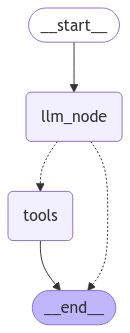


## case 1 - invoke with a message which odes NOT requires the tool "multiply" to be called
      
{'messages': [HumanMessage(content='Hi I am Rahul!', additional_kwargs={}, response_metadata={}, id='e495c98c-69be-4e70-b90f-0b8428e9b5c2'), AIMessage(content='Hello Rahul! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 60, 'total_tokens': 72, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-463d5dcb-90ba-44a6-9f57-c4df278ed540-0', usage_metadata={'input_tokens': 60, 'output_tokens': 12, 'total_tokens': 72, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
=========

In [41]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
#from typing_extensions import TypedDict
from typing import Annotated
from IPython.display import display, Image

## Additional imports needed for creating ToolNode
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

class MyState(MessagesState):
    # We dont need to add messages key like we did in previous section as langraph has already made this available as pre-built
    # Any other key apart from "message" can be added.
    # Hence commenting out the below key
    # messages: Annotated[list[AnyMessage],add_messages]
    pass


# Node 
# Defining a node(which is an LLM defined in step 1.1 using our State)
def llm_node(state):
    return {"messages":llm_with_tools.invoke(state["messages"] )}


graph_builder = StateGraph(MyState)

graph_builder.add_node("llm_node",llm_node)
graph_builder.add_node("tools",ToolNode([multiply]))


graph_builder.add_edge(START,"llm_node")
graph_builder.add_conditional_edges("llm_node",tools_condition)
# If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
# (remember the previous section's response, where it did not actually call the tool, but returned a tool_calls)
# If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
graph_builder.add_edge("tools",END)

graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

print("""
## case 1 - invoke with a message which odes NOT requires the tool "multiply" to be called
      """)
response = graph.invoke({"messages": HumanMessage(content="Hi I am Rahul!")})
print(response)

for message in response["messages"]:
    message.pretty_print()

print("""
## case 2 - invoke with a message which requires the tool "multiply" to be called
      """)
response2 = graph.invoke({"messages": HumanMessage(content="What is 5 multiplied by 310?", name="Chirantan")})
print(response2)

for message in response2["messages"]:
    message.pretty_print()